#  SYNTHESIZER:Rethinking Self-Attention in Transformer Models

# 合成器:重新思考Transformer模型中的Self-Attention

# Abstract

# 摘要



The dot product self-attention is known to be central and indispensable to state-of-the-art Transformer models. But is it really required? This paper investigates the true importance and contribution of the dot product-based self-attention mechanism on the performance of Transformer models. Via extensive experiments, we find that (1) random alignment matrices surprisingly perform quite competitively and (2) learning attention weights from token-token (query-key) interactions is not that important after all. To this end, we propose SYNTHESIZER, a model that learns synthetic attention weights without token-token interactions. Our experimental results show that SYNTHESIZER is competitive against vanilla Transformer models across a range of tasks, including MT (EnDe, EnFr), language modeling (LM1B), abstractive summarization (CNN/Dailymail), dialogue generation (PersonaChat) and Multi-task language understanding (GLUE, SuperGLUE).

最先进的Transformer模型的点积的self-attention是众所周知的核心和必不可少。但这真的是必需的吗?本文探讨了基于点积的self-attention对Transformer模型性能的真正重要性和贡献。通过大量的实验，我们发现(1)随机排列矩阵惊人地表现出相当有竞争力，(2)从token-token(查询键)交互中学习注意力权重并不是那么重要。为此，我们提出了SYNTHESIZER（合成器），一个学习综合注意力权重没有token-toke交互的模型。我们的实验结果表明，SYNTHESIZER与vanilla Transformer模型在一系列任务中具有竞争力，包括MT (EnDe, EnFr)，语言建模(LM1B)，抽象摘要(CNN/Dailymail)，对话生成(PersonaChat)和多任务语言理解(GLUE, SuperGLUE)。



# 1 Introduction

# 1介绍



Transformer models [Vaswani et al., 2017] have demonstrated success across a wide range of tasks. This has resulted in Transformers largely displacing once popular auto-regressive and recurrent models in recent years. At the heart of Transformer models lies the query-key-value dot product attention. The success of Transformer models is widely attributed to this self-attention mechanism since fully connected token graphs, which are able to model long-range dependencies, provide a robust inductive bias.

Transformer模型[Vaswani等人，2017]已经在广泛的任务中证明了成功。这使得Transformer在很大程度上取代了近年来流行的自回归和循环模型。Transformer模型的核心是关注查询键值点积。Transformer模型的成功被广泛归因于这种self-attention，因为全连通token graphs能够建模远程依赖关系，提供了稳健的归纳偏差。



But is the dot product self-attention really so important? Do we need it? Is it necessary to learn attention weights via expensive pairwise dot products? This paper seeks to develop a deeper understanding of the role that the dot product self-attention mechanism plays in Transformer models.

但是对点积的关注真的那么重要吗?我们需要它吗?有必要通过昂贵的成对点积来学习注意力权重吗?本文试图加深对点积self-attention在Transformer模型中的作用的理解。


The fundamental role of dot product self-attention is to learn self-alignment, i.e., to determine the relative importance of a single token with respect to all other tokens in the sequence. To this end, there have been memory metaphors and analogies constructed to support this claim. Indeed, the terms query, keys, and values imply that self-attention emulates a content-based retrieval process which leverages pairwise interactions at its very core. This paper rethinks this entire process.

点积self-attention的基本作用是学习自对准。以确定单个token相对于序列中所有其他token的相对重要性。为此，有记忆隐喻和类比构建来支持这一主张。实际上，术语查询、键和值意味着，self-attention模拟了基于内容的检索过程，在其核心利用了两两交互。本文对这整个过程进行了反思。



Moving against convention, this paper postulates that we can not only do without dot product self-attention but also content-based memory-like self-attention altogether. Traditionally, attention weights are learned at the instance or sample level, where weights are produced by instance-level by pairwise  interactions. As a result, these instance-specific interactions often fluctuate freely across different instances as they lack a consistent global context.

与传统的做法相反，本文提出了不需要点积的self-attention，也可以不需要基于内容的类记忆的self-attention。传统上，注意力权重是在实例级或样本级学习的，其中权重是在实例级通过两两交互产生的。因此，这些特定于实例的交互经常在不同实例之间自由波动，因为它们缺乏一致的全局上下文。

This paper proposes SYNTHESIZER, a new model that learns to synthesize the self-alignment matrix instead of manually computing pairwise dot products. We propose a diverse suite of synthesizing functions and extensively evaluate them. We characterize the source information that these synthesizing functions receive, i.e., whether they receive information from individual tokens, token-token interactions, and/or global task information. Intuitively, different source inputs to the synthesizing functions should capture diverse views, which may be useful when employed in conjunction.

本文提出了一种新的模型SYNTHESIZER（合成器），它学习合成自对准矩阵而不是手工计算成对点积。我们提出了一套不同的综合功能，并对它们进行了广泛的评价。我们描述了这些综合功能接收的源信息，即它们是否从单个tokens、token-token交互和/或全局任务信息接收信息。直观地说，对综合功能的不同源输入应该捕获不同的视图，这在联合使用时可能很有用。



Aside from generalizing the standard Transformer model, we show that it is possible to achieve competitive results with fully global attention weights that do not consider token-token interactions or any instance-level (local) information at all. More specifically, a random matrix SYNTHESIZER model achieves a 27.27 BLEU score on WMT 2014 English-German1 . We observe that the popular and well-established dot-product content-based attention can be replaced with simpler variants without sacrificing much performance in some cases. In general, we believe our findings will spur further investigation and discussion about the true role and utility of the self-attention mechanism in Transformer models. 

除了对标准Transformer模型进行一般化之外，我们还展示了在完全不考虑token-token交互或任何实例级(本地)信息的情况下，实现完全全局注意力权重的竞争结果是可能的。更具体地说，随机矩阵SYNTHESIZER模型在WMT 2014 English-German中获得了27.27的BLEU分。我们观察到，在某些情况下，可以用更简单的变体替换流行的和完善的基于内容的点积注意力，而不会牺牲太多性能。总的来说，我们相信我们的发现将促进进一步的调查和讨论自我注意机制在Transformer模型中的真实作用和效用。



SYNTHESIZER is completely transformation-based, only relies on simple feed-forward layers, and completely dispenses with dot products and explicit token-token interactions. To reiterate, this work moves away from the implied notion of a query-key-value memory store and shows that randomized alignment matrices are sufficient for many tasks in practice.

SYNTHESIZER合成器完全是基于转换的，只依赖于简单的前馈层，完全没有点积和显式的token-token交互。重申一下，此工作偏离了查询键-值内存存储的隐含概念，并表明随机排列矩阵对于实际中的许多任务已经足够了。

Our Contributions Our key contributions are described as follows: 

我们的主要贡献如下:



• We propose Synthetic Attention, a new way of learning to attend without explicitly attending (i.e., without dot product attention or content-based attention). Instead, we generate the alignment matrix independent of token-token dependencies and explore a potpourri of parameterized functions for synthesizing attention matrices. 

•我们提出了综合注意力机制，这是一种学习在没有明确参与的情况下参与的新方法。没有点积Attention或基于内容的Attention)。相反，我们生成了独立于token-token依赖的对齐矩阵，并探索了一堆参数化函数来合成注意力矩阵。



• We propose SYNTHESIZER, a new model that leverages Synthetic Attention. The model performs competitive to state-of-the-art Transformer models on a wide range of language tasks, including machine translation and language modeling. 

•我们提出SYNTHESIZER(合成器)，一种利用合成注意力的新模式。该模型在广泛的语言任务(包括机器翻译和语言建模)上与最先进的Transformer模型具有竞争力。



• Moreover, We show that (1) random learnable alignment matrices perform competitively and (2) token-token dependencies are not necessary to achieve good performance with Transformer models on certain tasks.

•此外，我们证明(1)随机可学习对齐矩阵的性能具有竞争性;(2)token-token的依赖关系并不是获得良好性能的必要条件Transformer在某些任务上建模。







# 2 Related Work 

# 2相关工作



Attention-based models are used across a wide spectrum of problem domains. Such models are especially popular, due to their effectiveness, in the language and vision domains. Attention models can be traced back to the machine translation models of [Bahdanau et al., 2014] and [Luong et al., 2015], where attention is employed to learn soft word alignments between language pairs. The intuition behind the attention mechanism is deeply-rooted in the notion of memory-based retrieval [Graves et al., 2014, Weston et al., 2014], in which soft differentiable addressing of memory was initially proposed.

基于注意力的模型被广泛应用于问题领域。由于其有效性，这些模型在语言和视觉领域尤其流行。注意力模型可以追溯到[Bahdanau et al.， 2014]和[Luong et al.， 2015]的机器翻译模型，其中注意力用于学习语言对之间的软词对齐。注意机制背后的直觉深深植根于基于记忆的检索的概念[Graves et al.， 2014, Weston et al.， 2014]，其中记忆的软可区分寻址最初被提出。



The paradigm of learning self-alignments, also known as self-attention, has been largely popularized by Transformer models [Vaswani et al., 2017]. This technical narrative has also been explored by a number of other recent studies, including those on intra-attention [Parikh et al., 2016], self-matching networks [Wang et al., 2017], and LSTMN [Cheng et al., 2016]. To this end, Transformer models, which function primarily based on self-attention and feed-forward layers, generally serve as a reliable replacement for autoregressive recurrent models.

学习自校准的范式，也被称为self-attention，已经通过Transformer模型得到了广泛普及[Vaswani等人，2017]。最近的一些其他研究也对这种技术叙述进行了探索，包括关于intra-attention(Parikh等人，2016)、self-matching networks(Wang等人，2017)和LSTMN (Cheng等人，2016)的研究。为此，主要基于self-attention和前馈层的Transformer模型通常可以作为自回归回归模型的可靠替代。



The self-attention layer itself has been the subject of many recent technical innovations. For example, recent studies have investigated improving the layer’s overall efficiency via sparsification and reducing the complexity of computing the alignment matrix [Child et al., 2019, Kitaev et al., 2020, Huang et al., 2018, Tay et al., 2020, Beltagy et al., 2020]. These methods are tightly coupled with the query-key-value paradigm, employing a form of memory-based content retrieval as an attention  mechanism. On the other end of the spectrum, there have been studies that advocate for replacing self-attention with convolution [Wu et al., 2019]. The recent surge in interest in simplifying the attention mechanism raises important questions about the role and utility of the pairwise dot products, which are one the defining characteristics of self-attention models.

self-attention层本身就是最近许多技术创新的主题。例如，最近的研究研究了通过稀疏化和降低计算对齐矩阵的复杂性来提高层的整体效率[Child等人，2019,Kitaev等人，2020,Huang等人，2018,Tay等人，2020,Beltagy等人，2020]。这些方法与查询键-值范式紧密耦合，使用一种基于记忆的内容检索形式作为注意机制。另一方面，也有研究提倡用卷积代替自我注意[Wu et al.， 2019]。最近在简化注意机制方面的兴趣激增提出了关于成对d点积的作用和效用的重要问题，这是 self-attention模型的定义特征之一。



Our work is a novel take on the self-attention mechanism in Transformer models. We delve deeper, starting with replacing the pairwise dot products with what we call synthesizing functions that learn attention matrices that may or may not depend on the input tokens. The most closely related work is [Raganato et al., 2020], in which the authors propose using fixed (i.e., not learned) attention patterns in Transformer encoders. However, the scope of their work is limited to encoders and relies on manually defined patterns that seem to work well. Our work takes this intuition further and expands on this narrative.

我们的工作是对Transformer模型中的self-attention的一种新的尝试。我们钻研得更深了，从用我们所说的综合函数替换成对的点积开始，综合函数学习注意力矩阵，它可能依赖于也可能不依赖于输入tokens。与之最密切相关的研究是[Raganato et al.， 2020]。(非学习)Transformer编码器的注意模式。然而，他们的工作范围仅限于编码器，并且依赖于手动定义的模式，这些模式似乎工作得很好。我们的作品进一步扩展了这种直觉。

# 3 Our Proposed Method

# 3我们提出的方法

This section introduces our proposed SYNTHESIZER model. At its core, our model is essentially a Transformer model with self-attention modules replaced with our Synthetic Attention modules. Figure 3.1 illustrates the key ideas behind (a) Transformer (b) Dense Synthesizers and (c) Random Synthesizers.

这一节介绍了我们提出的（SYNTHESIZER）合成器模型。在它的核心，我们的模型本质上是一个Transformer模型用我们的Synthetic Attention模块代替self-attention模块。图3.1说明了(a)Transformer(b)Dense Synthesizers和(c)Random Synthesizers背后的关键思想。

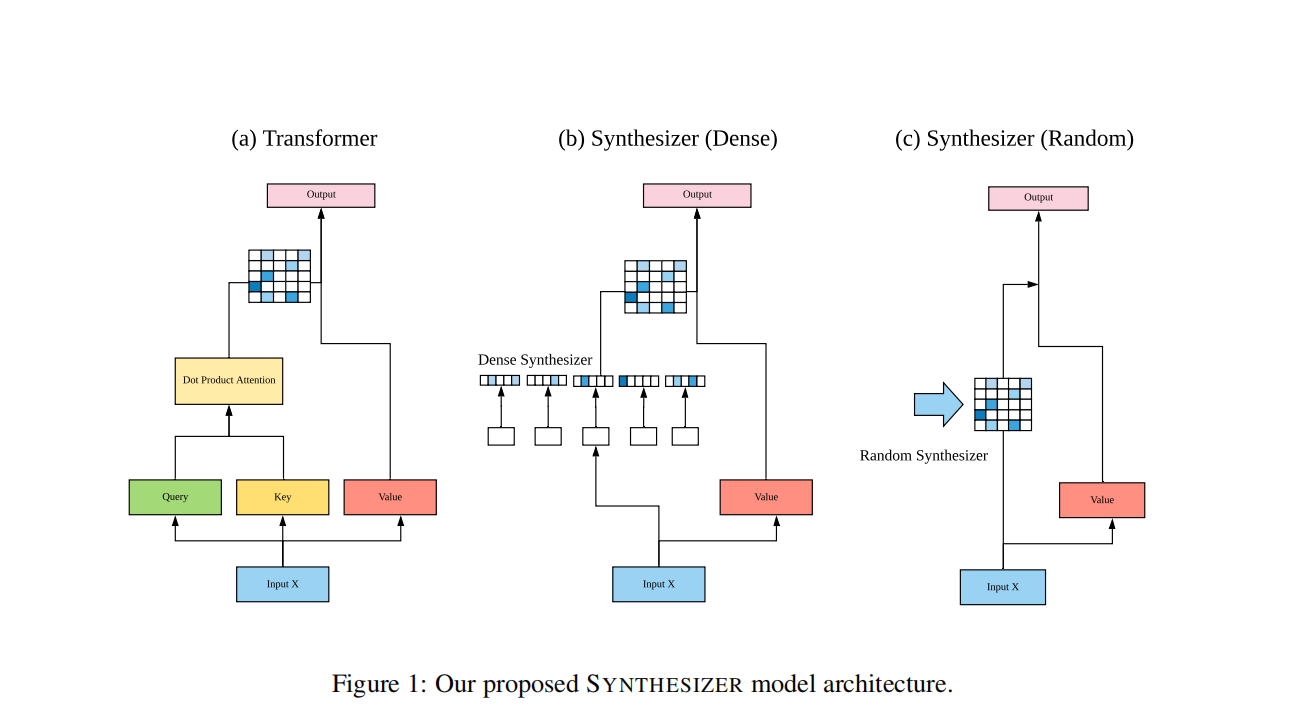

## 3.1 Synthesizer Model

## 3.1合成器模型



This section introduces Synthetic Attention, our proposed self-attention module. Our model removes the notion of query-key-values in the self-attention module and directly synthesizes the alignment matrix instead.

本节介绍综合注意，即我们提出的自我注意模块。我们的模型去掉了自注意模块中查询键值的概念，直接合成了对齐矩阵。



Dense Synthesizer 

密集的合成器



Let us consider the simplest variation of the SYNTHESIZER model which is conditioned on each input token. Overall, our method accepts an input X ∈ R^l×d and produces an output of Y ∈ R^l×d . Here, l refers to the sequence length and d refers to the dimensionality of the model. We first adopt F(.), a parameterized function, for projecting input Xi from d dimensions to l dimensions. 

让我们考虑以每个输入token为条件的合成器模型的最简单的变化。总的来说，我们的方法接受输入X ∈ R^l×d，产生的输出Y∈X ∈ R^l×d。其中l为序列长度，d为模型的维数。首先采用参数化函数F(.)将输入Xi从d维投影到l维。

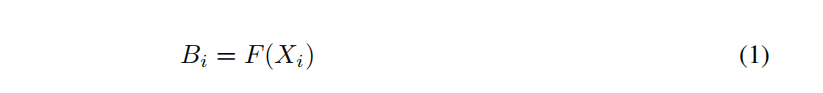

where F(.) is a parameterized function that maps R^d to R^l and i is the i-th token of X. Intuitively, this can be interpreted as learning a token-wise projection to the sequence length l. Essentially, with this model, each token predicts weights for each token in the input sequence. In practice, we adopt a simple two layered feed-forward layer with ReLU activations for F(.): 

其中F(.)是一个将R^d映射到R^l的参数化函数，i是x的第i个记号，直观地，这可以解释为学习一个记号向序列长度的投影'。本质上，在这个模型中，每个token预测了输入序列中每个token的权重。在实际中，我们对F(.)采用简单的ReLU激活的两层前馈层:

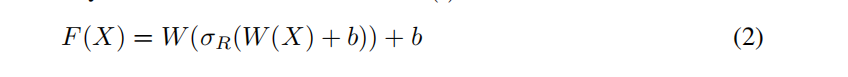

where σR is the ReLU activation function. Hence, B is now of R^l×l . Given B, we now compute: 

其中，σR为ReLU激活函数。因此，B现在是 R^l×l。已知B，我们现在计算:

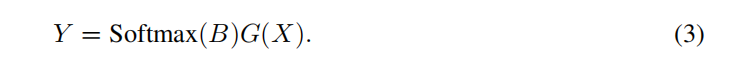

where G(.) is another parameterized function of X that is analogous to V (value) in the standard Transformer model.

其中G(.)是X的另一个参数化函数，类似于标准Transformer模型中的V(值)。



This approach eliminates the dot product altogether by replacing QK^T in standard Transformers with the synthesizing function F(.).

这种方法通过用合成函数F(.)替换标准Transformers中的QK^T，完全消除了点积。





Random Synthesizer 

随机的合成器



The previous variant learns synthetic attention by conditioning on each input of X and projecting to l dimensions. Hence, the Dense Synthesizer conditions on each token independently, as opposed to pairwise token interactions in the vanilla Transformer model. We consider another variation of SYNTHESIZER where the attention weights are not conditioned on any input tokens. Instead, the attention weights are initialized to random values. These values can then either be trainable or kept fixed (denoted as Fixed).

前一个变量通过对X的每个输入进行条件反射，并投射到l维来学习综合注意。因此，密集合成器对每个token的条件是独立的，而不是普通Transformer模型中成对的token交互。我们考虑了SYNTHESIZER合成器的另一种变体，其中注意权重不受任何输入tokens的限制。相反，注意力权重被初始化为随机值。这些值可以是可训练的，也可以保持固定(表示为固定)。



Let R be a randomly initialized matrix. The Random Synthesizer is defined as: 

设R是随机初始化的矩阵。随机合成器定义为:

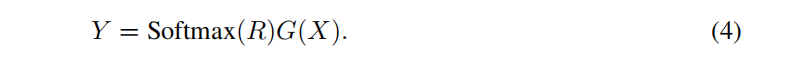

where R ∈ R^l×l . Notably, each head adds l^2 parameters to the network. The basic idea of the Random Synthesizer is to not rely on pairwise token interactions or any information from individual token but rather to learn a task-specific alignment that works well globally across many samples. This is a direct generalization of the recently proposed fixed self-attention patterns Raganato et al. [2020].

其中R∈R^l×l。值得注意的是，每个磁头向网络添加了l^2参数。随机合成器的基本思想是不依赖于成对的token交互或来自单个token的任何信息，而是学习一种特定于任务的对齐方式，这种方式在许多样本中全局运行良好。这是Raganato等人[2020]最近提出的固定self-attention 模式的直接概括。

Factorized Models 

因式分解模型



The Dense Synthesizer adds d×l parameters to the network. On the other hand, the Random Synthesizer adds l×l parameters. Here, note that we omit the Q, K projections in the standard Transformer which results in further parameter savings. Despite these savings, synthesized models can be cumbersome to learn when l is large. Hence, we propose factorized variations of the SYNTHESIZER models and show that these variants perform comparably in practice.

密集合成器将d * l参数添加到网络中。另一方面，随机合成器增加l×l参数。这里，请注意，我们省略了标准Transformer中的Q, K投影，从而进一步节省了参数。尽管有这些节省，但是当l很大时，学习合成模型可能会很麻烦。因此，我们提出了合成器模型的因式分解变量，并证明了这些变量在实际应用中具有可比性。



Factorized Dense Synthesizer 

因式分解Dense的合成器



Factorized outputs not only slightly reduce the parameter cost of the SYNTHESIZER but also aid in preventing overfitting. The factorized variant of the dense synthesizer can be expressed as follows: 

因式分解输出不仅可以稍微降低合成器的参数成本，而且有助于防止过拟合。密集合成器的因式分解变量可以表示为:

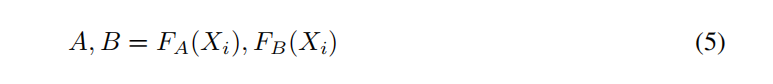

where FA(.) projects input Xi into a dimensions, FB(.) projects Xi to b dimensions, and a × b = l. The output of the factorized module is now written as: 

其中FA(.)将输入Xi投射到a个维度，FB(.)将Xi投射到b个维度，a×b = l，分解后的模块输出如下:

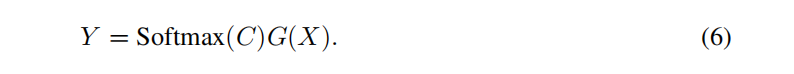

where C = HA(A) ∗ HB(B) where HA, HB are tiling functions and C ∈ R^l×l . The tiling function simply duplicates the vector k times, i.e., R^l → R^lk. In this case, HA() is a projection of Ra → R ab and HB() is a projection of R^b → R^ba. To avoid having similar values within the same block, we compose the outputs of HA and HB.

C = HA(A) ∗ HB(B) 其中HA, HB是平铺函数，C∈R^l×l。平铺函数简单地重复了向量k次，即R^l → R^lk。在本例中，HA()是Ra→R^ab的投影，HB()是R^b→R^ba的投影。为了避免在同一个块中有相似的值，我们将HA和HB组成输出。


Factorized Random Synthesizer 

映像随机合成器



Similar to Factorized Synthesizers, we are also able to factorize R into low rank matrices R1, R2 ∈ R^l×k.

与因子分解合成器类似，我们也能够将R分解为低秩矩阵R1, R2∈R^l×k。

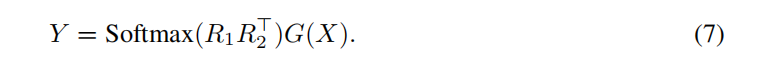

Therefore, it is easy to see that, for each head, this reduces the parameter costs from l^2 to 2(lk) where k << l and hence helps prevent overfitting. In practice, we use a small value of k = 8.

因此，很容易看出，对于每个head，这将参数代价从l^2降低到2(lk)，其中k << l，有助于防止过拟合。在实践中，我们使用一个k = 8的小值。

Mixture of Synthesizers 

混合合成器



Finally, we note that all of the proposed synthetic attention variants can be mixed in an additive fashion. This can be expressed as: 

最后，我们注意到所有提出的合成注意变量都可以以加性的方式混合。这可以表示为:

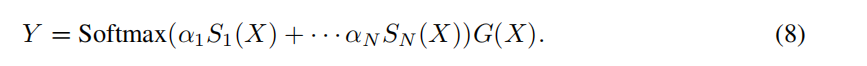

where S(.) is a parameterized synthesizing function and the α (where sigma α = 1) are learnable weights. In the case of mixing Random Factorized with standard Dense Synthesizers, this is expressed as:

其中S(.)是一个参数化的综合函数，而元组(其中∑α= 1)是可学习的权重。在混合随机因子分解为标准密集合成器的情况下，表示为:


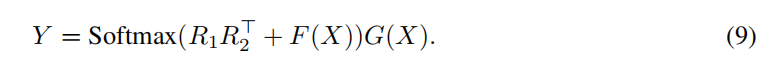

We investigate several Mixture of Synthesizers variants in our experiments.

在我们的实验中，我们调查了几种合成器变体的混合。

## 3.2 Discussion

## 3.2讨论



This paper asks fundamental questions about the attention matrix A and whether it is possible to synthesize A by alternate means other than pairwise attention. It is worth noting that the regular dot product attention can also be subsumed by our SYNTHESIZER framework, i.e., SYNTHESIZER generalizes the Transformer model. In the case of the Transformer, the synthesizing function in question is S(X) = FQ(X)FK(X)^T.

本文提出了关于注意矩阵A的基本问题，以及是否有可能用除成对注意之外的其他方法来合成注意矩阵A。值得注意的是，常规的点积注意也可以被纳入我们的合成器框架，即合成器对Transformer模型进行了推广。对于Transformer，所讨论的合成函数是S(X) = FQ(X)FK(X)^T。

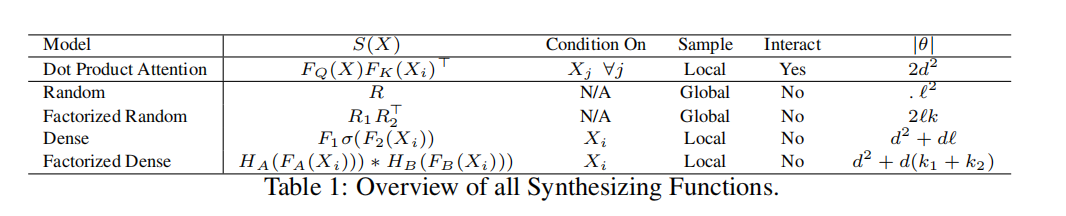

# 4 Experiments

# 4实验



This section outlines our experimental setup and results.

本节概述了我们的实验设置和结果。

## 4.1 Machine Translation

## 4.1机器翻译



We conduct experiments on WMT’14 English-German (EnDe) and WMT’14 English-French (EnFr), which are well-established machine translation benchmarks. The WMT EnDe dataset is comprised of 4.5 million sentence pairs, while the EnFr dataset consists of 36 million sentence pairs. We implement our models in Tensor2Tensor using the standard base hyperparameter settings. Further details can be found in the appendix.

我们在WMT'14英语-德语(EnDe)和WMT ' 14英语-法语(EnFr)上进行实验，这是完善的机器翻译基准。WMT EnDe数据集由450万对句子组成，EnFr数据集由3600万对句子组成。我们使用标准基超参数设置在Tensor2Tensor中实现我们的模型。详情请参阅附录。



Experimental Results on Machine Translation 

机器翻译的实验结果



Table 2 reports results on machine translation. First, we observe that our Random Synthesizer baseline achieves 27.27 on EnDe and 41.12 on EnFr. The non-trainable  variant performs substantially worse, but still yields surprisingly strong ≈ 24 BLEU with fixed random attention weights. Most other SYNTHESIZER variants achieve competitive performance, although with slight performance degradation compared to Transformers. An interesting finding is that the Mixture model of Random and Dense synthesizer outperforms vanilla Transformers on EnDe. When mixing the standard dot product attention, performance further increases by +0.8 BLEU points on EnDe.

表2报告了机器翻译的结果。首先，我们观察到我们的随机合成器基线在EnDe上达到27.27，在EnFr上达到41.12。不可训练的变体表现更差，但在固定的随机注意权重下仍然产生惊人的强劲≈24 BLEU。大多数其他合成器变体实现了竞争性能，尽管与变压器相比有轻微的性能退化。一个有趣的发现是随机和密集合成器的混合模型在EnDe上优于普通变压器。当混合标准点产品注意时，性能进一步提高+0.8个蓝点。

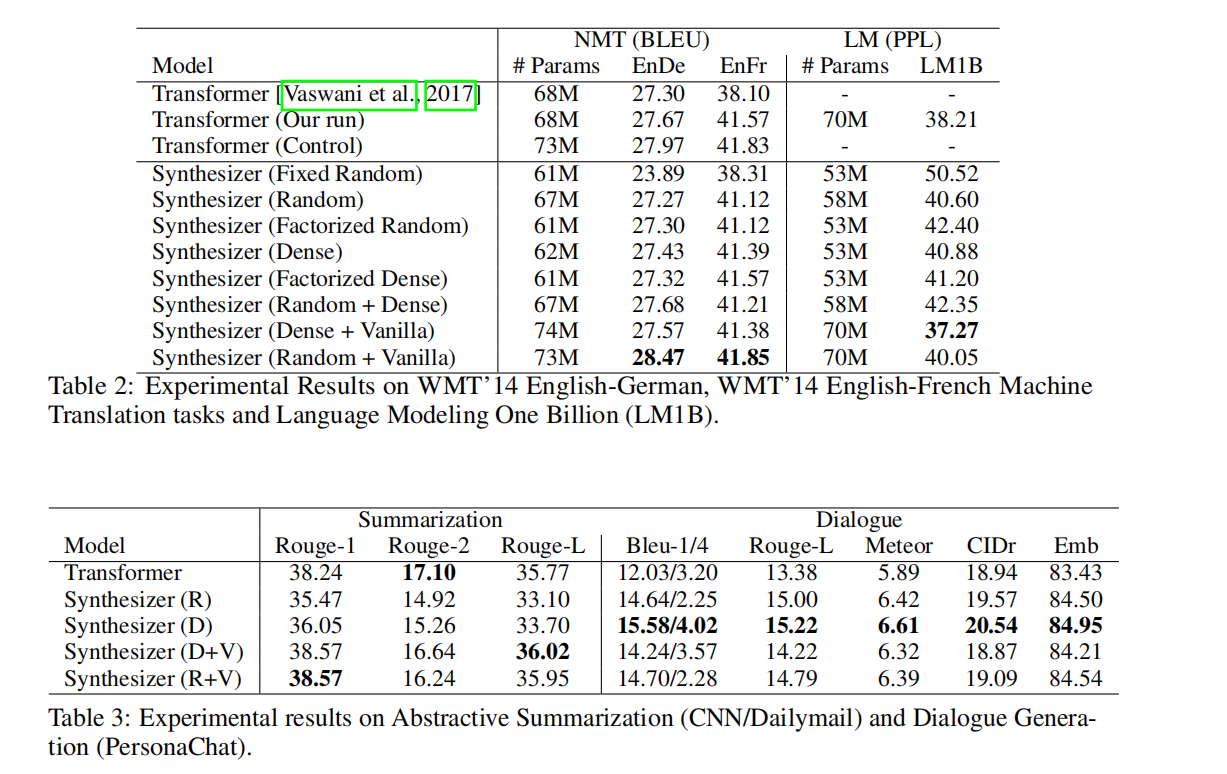

In general, the performance of SYNTHESIZER variants are competitive with standard Transformers for this task. Furthermore, SYNTHESIZER variants have reduced computational complexity and parameter costs that are about 10% lower than Transformers. When taken together, synthetic attention is an appealing alternative to traditional dot product self-attention.

一般来说，变型合成器的性能与标准Transformers相比具有竞争力。此外，变型的合成器降低了计算复杂度和参数成本，比Transformers低约10%。综合注意是传统点积自我注意的一种有吸引力的选择。

## 4.2 Language Modeling

## 4.2语言建模



We experiment on the well-established task of subword level language modeling. We use the Language Modeling One Billion (LM1B) dataset. Our baselines are similar to the ones used for machine translation except they only involve the decoder in the context of the LM task. We implement our models in Tensor2Tensor. We train our models on 300K steps on 16 TPU V2 chips. Further details can be found in the appendix.

我们对已确定的子词级语言建模任务进行了实验。我们使用语言建模十亿(LM1B)数据集。我们的基线类似于用于机器翻译的基线，除了它们只涉及LM任务上下文中的解码器。我们在Tensor2Tensor中实现我们的模型。我们在16个TPU V2芯片上训练我们的模型300K步。详情请参阅附录。



Experimental Results on LM1B 

在LM1B上的实验结果



Table 2 reports our results on LM1B (perplexity). We find that the Random Synthesizers perform within 1-2 perplexity points away from the vanilla Transformer model. The best performing model is the Synthesizer (Dense + Vanilla), which achieves the best performance on this setting.

表2报告了我们对LM1B (perplexity)的结果。我们发现随机合成器在1-2个困惑点内运行，远离普通Transformer模型。表现最好的模型是合成器(稠密+香草)，它在这个设置中获得了最好的性能。

## 4.3 Text Generation

## 4.3文本生成



Next, we evaluate SYNTHESIZER on two text generation tasks – abstractive summarization using the CNN/Dailymail dataset and dialogue generation using the PersonaChat dataset [Zhang et al., 2018]. The model used is a simple Seq2Seq Transformer model. We leverage our SYNTHESIZER in both the encoder and decoder. All models use the base size setting. For the dialogue generation task, due to the smaller dataset size, we train a small model for 20K steps. For the summarization task, we use the well-established metrics, i.e., Rouge-1, Rouge-2 and Rouge-L. For the dialogue generation task, we use NLG-Eval3 [Sharma et al., 2017] and report BLEU-1, BLEU-4, Rouge-L, Meteor, CIDr and Embedding based similarity scores (Emb).

接下来，我们对合成器在两个文本生成任务上进行评估——使用CNN/Dailymail数据集进行摘要抽象和使用PersonaChat数据集生成对话[Zhang et al.， 2018]。使用的模型是一个简单的Seq2Seq转换器模型。我们利用我们的合成器在编码器和解码器。所有的模型都使用基本尺寸设置。对于对话生成任务，由于较小的数据集大小，我们训练了一个小模型，达到20K步。对于总结任务，我们使用确定的度量，即Rouge-1, Rouge-2和Rouge-L。对于对话生成任务，我们使用NLG-Eval3 [Sharma等人，2017]并报告BLEU-1、BLEU-4、roug - l、流星、CIDr和基于嵌入的相似度评分(Emb)。


Results on Summarization 

结果总结



Table 3 reports results for the summarization and dialogue generation tasks. For summarization, we find that the (R) and (D) variants do not outperform Transformers. The performance of the (D) model is ≈ 2 Rouge-L points below Transformers. Hence, we postulate that the local sample-wise pairwise interactions are important for the summarization task. On the other hand, the utility of synthesized attention can also be observed, i.e., the (R+V) and (R+D) models both outperform Transformers.

表3报告了总结和对话生成任务的结果。总结一下，我们发现(R)和(D)变量的表现并没有优于转换器。(D)模型的性能在变压器下方≈2个Rouge-L点。因此，我们假设局部样本的两两交互对于摘要任务是重要的。另一方面，综合注意力的效用也可以观察到。在美国，(R+V)和(R+D)两种型号的性能都优于Transformers。

Results on Dialogue Generation 

对话产生的结果



On this task, Synthesizers (R) and (D) both outperform vanilla Transformers by a reasonable margin (≈ 1-3) points across most/all metrics. The best performing model here is the (D) variant. Surprisingly, unlike most other tasks, the (+V) variants do not perform well, signifying that dot product self-attention may actually be harmful for this task.

在这个任务中，合成器(R)和(D)的表现都优于香草变压器在大多数/所有指标上都有合理的边际(≈1-3)点。这里表现最好的模型是(D)变种。令人惊讶的是，不像大多数其他任务，(+V)变体执行得不好，这意味着点积的自我关注实际上可能对这个任务有害。

## 4.4 Multi-Task Natural Language Processing

## 4.4多任务自然语言处理



Finally, we evaluate our SYNTHESIZER model on multi-task language understanding (GLUE [Wang et al., 2018] and SuperGLUE [Wang et al., 2019]) following the T5 (text-to-text Transformer) [Raffel et al., 2019] methodology. Our experiments are based on the T5 repository and are implemented in Mesh Tensorflow [Shazeer et al., 2018]. We pre-train the vanilla T5 models and our models for 524288 steps using the span denoising objective. We then co-train the model on multiple tasks. We co-train on the en_mix mixture (SuperGLUE and GLUE) for 100k steps with a constant learning rate of 10^-3.

最后，我们根据T5 (text-to-text Transformer) [Raffel等，2019]方法评估了我们的多任务语言理解(GLUE [Wang et al.， 2018]和SuperGLUE [Wang et al.， 2019])合成器模型。我们的实验基于T5存储库，并在Mesh Tensorflow中实现[Shazeer et al.， 2018]。我们使用跨度去噪目标对普通T5模型和我们的模型进行了524288步的预训练。然后我们在多个任务上共同训练这个模型。我们在en_mix混合物(SuperGLUE and GLUE)上共同训练100k步，学习速率恒定为10^-3。



Results on GLUE and SuperGLUE 

在GLUE和SuperGLUE上的效果

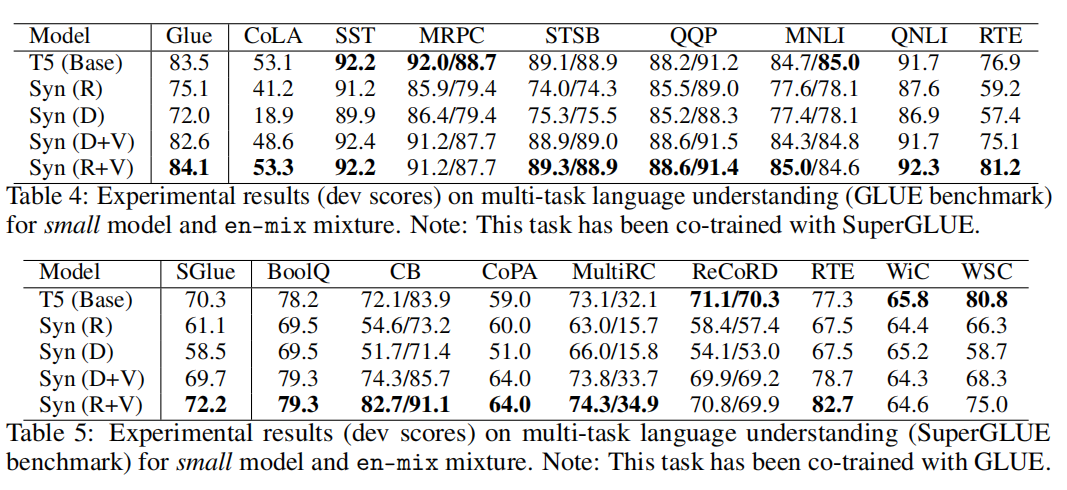

Tables 4 and 5 report results on the GLUE and SuperGLUE benchmarks. We note that the (R) and (D) variants of SYNTHESIZER do not achieve reasonable performance. This can be largely attributed to the fact that the encoder self-attention in the T5 setting also functions as a cross-sentence attention. For example, in the entailment or reading comprehension tasks, the premise and hypothesis are concatenated together and self-attention effectively acts as cross-sentence attention. Optimistically, we observe that Syn (R+V) outperforms the T5 model by a substantial margin (+1.9 points on SuperGLUE and +0.6 points on GLUE).

表4和5报告了 GLUE 和 SuperGLUE基准测试的结果。我们注意到(R)和(D)变型合成器没有达到合理的性能。这在很大程度上可以归因于这样一个事实，即编码器在T5设置中的self-attention也具有跨句注意的功能。例如，在隐含或阅读理解任务中，前提和假设被串联在一起，self-attention有效地起到跨句注意的作用。乐观地说，我们观察到Syn (R+V)的表现远远超过T5模型(SuperGLUE+1.9分，GLUE+0.6分)。

## 4.5 Overall Summary of Quantitative Results

## 4.5定量结果的总体总结



On all evaluated tasks, we showed that synthesized attention functions competitively, i.e., it achieves performance reasonably close to the dot product self-attention. On one task (dialogue generation), the dot product self-attention is found to actually degrade performance. Amongst the other tasks, machine translation is the least affected by the removal of the vanilla dot product. These findings allow us to introspect about whether pairwise comparisons for self-attention are even necessary. We would like to emphasize that this solely refers to self-attention and not cross-attention. On the multi-task language understanding benchmark, the self-attention functions as a form of cross-attention  by concatenating sentence pairs. Hence, synthesize attention performance is considerably worse than vanilla Transformers. However, complementing the base T5 model with synthetic attention boosts performs, showing that synthesized attention provides additional value to current state-of-the-art models.

在所有被评估的任务中，我们展示了综合注意力功能的竞争性，即它达到相当接近点积self-attention的性能。在一个任务(对话生成)上，点积的self-attention实际上会降低性能。在其他任务中，机器翻译受去掉点积的影响最小。这些发现让我们反思是否有必要对self-attention进行两两比较。我们想强调的是，这仅仅是指self-attention，而不是交叉关注。在多任务语言理解测试中，self-attention通过连接句子对发挥交叉注意的作用。因此，综合注意力性能比普通Transformers差很多。然而，与基础T5模型的合成注意力增强执行，表明合成注意力提供了额外的价值，目前的最先进的模型。



## 4.6 Analysis

## 4.6分析



In this section, we perform a deeper analysis of the SYNTHESIZER model.

在本节中，我们将对合成器模型进行更深入的分析。



Distribution of Weights 

权重分配



We are interested in investigating how the synthetically generated attention weights differ from the dot product attention weights. Figure 2 shows the attention histograms on trained Transformer and SYNTHESIZER models. We report histograms at layers 1, 3, and 5 of a 6 layered (Transformer or SYNTHESIZER) model at 50K steps. We found that the weight distributions remain relatively identical thereafter. Figure 3 shows the initialization state. We observe that there are distinct differences in the weight distribution of SYNTHESIZER and Transformer models. The variance of the SYNTHESIZER weights tends to be higher. On the other hand, the weights on the Transformer model tends to gravitate near 0 and have smaller variance. There are also notable differences across the (R) and (D) SYNTHESIZER variants. Specifically, the (D) model in general has greater max values with more values in the 0.1-0.2 range while the values of the R model tends to stay closer to 0.

我们感兴趣的是调查合成产生的attention权重与点积attention权重有何不同。图2显示了经过训练的Transformer和合成器SYNTHESIZER模型上的注意力直方图。我们报告的直方图在层1,3，和5的6层(Transformer or SYNTHESIZER)模型在50K步骤。我们发现，此后权重分布保持相对相同。图3显示了初始化状态。我们观察到Transformer和SYNTHESIZER模型在重量分布上有明显的差异。合成器权重的方差往往较高。另一方面，Transformer模型上的权重趋于接近于0，且方差较小。在(R)和(D)合成器变体之间也有显著的差异。具体而言，(D)模型的max值一般较大，在0.1-0.2范围内取值较多，而R模型的值趋于接近0。

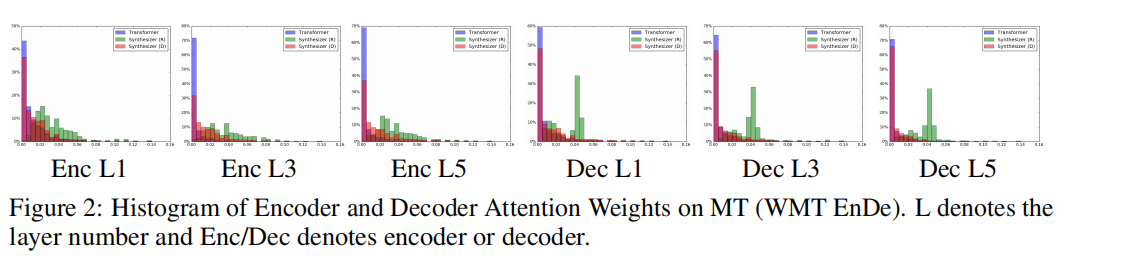

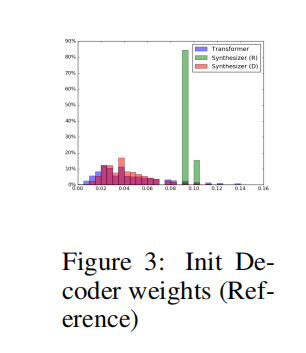

Effect of Number of Heads 

正面次数的影响



We also investigate the impact of the number of heads on performance.

我们还研究了正面次数对性能的影响。



We trained three Random Synthesizer models for the small version of the machine translation tasks using the T5 framework without pretraining. For simplicity, evaluation is done via greedy decoding. We report scores on the development set. Table 6 reports the results on varying the number of heads on performance.

我们使用T5框架，在没有预先训练的情况下，为小型机器翻译任务训练了三个随机合成器模型。为了简单起见，计算是通过贪心译码来完成的。我们报告了开发集的得分。表6报告了在性能上改变正面数的结果。
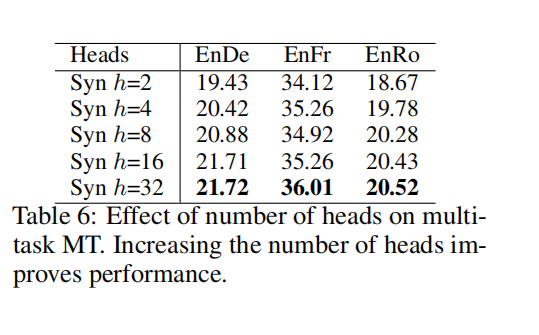


# 5 Conclusion

# 5 结论



This paper proposed SYNTHESIZER, a new Transformer model that employs Synthetic Attention. We conducted a principled study to better understand and evaluate the utility of global alignment and local, instance-wise alignment (e.g., independent token and token-token based) in self-attention. We show that, on multiple tasks such as machine translation, language modeling and dialogue generation, synthetic attention demonstrates competitive performance compared to vanilla selfattention. Moreover, for the dialogue generation task, pairwise interactions actually hurt performance. Notably, we reemphasize that this study refers to self-attention. We found that we are not able to replace cross-attention with simpler variants in most cases. Overall, we hope our study will encourage further investigations into the component-wise effectiveness of well-established Transformer models.

本文提出了一种新的采用综合注意的Transformer模型——合成器。我们进行了一项有原则的研究，以更好地理解和评估全局对齐和局部实例对齐(例如，独立的token和基于token-token)在self-attention中的效用。我们表明，在诸如机器翻译、语言建模和对话生成等多个任务中，综合注意力比普通的self-attention表现出更有竞争力的表现。此外，对于对话生成任务，成对的交互实际上会损害性能。值得注意的是，我们再次强调，这项研究涉及self-attention。我们发现，在大多数情况下，我们无法用更简单的变体来替代交叉关注。总的来说，我们希望我们的研究将鼓励进一步研究已经建立的Transformer模型在组件方面的有效性。



# 6 Supplementary Material

# 6 补充材料



## 6.1 Detailed Setup for Experiments

## 6.1实验详细设置



Machine Translation 

We implement our models in Tensor2Tensor, using the standard base hyperparameter settings. Specifically, we use byte-pair encoding (BPE), 6-layered Transformer networks with hidden size 512, filter size of 2048 and 8 heads. We use label smoothing of 0.1. The maximum sequence length is set to 256. Training is performed using 8 x V100 GPUs. We train all models for 250K steps and report results at the last checkpoint. We use a length penalty of 0.6 and beam size of 4 following the default settings. We also compare with standard Transformer models. In the interest of keeping a consistent, fair evaluation across all model settings, we do not use checkpoint averaging or tune the decoding hyperparameters although this generally leads to better performance. We evaluate BLEU scores using sacrebleu.

机器翻译

我们使用标准基超参数设置在Tensor2Tensor中实现我们的模型。具体来说，我们使用字节对编码(BPE)，隐藏尺寸为512的6层Transformer网络，2048的过滤器和8个头。我们使用0.1的标签平滑。最大序列长度设置为256。使用8 x V100 GPUs进行训练。我们对所有模型进行250K步骤的训练，并在最后一个检查点报告结果。按照默认设置，我们使用0.6的长度惩罚和4的光束大小。我们还与标准Transformer型号进行了比较。为了在所有模型设置中保持一致、公平的评估，我们不使用平均检查点或调优解码超参数，尽管这通常会带来更好的性能。我们使用sacrebleu来评估BLEU的分数。




Language Modeling 

语言建模



We implement our models in Tensor2Tensor using the packed TPU setup of sequence length 256. We train our models on 300K steps on 16 TPU V2 chips. We use the lmx_base model setting for fair comparison across all model variations. The model has 6 layers and 8 heads, along with a filter width of 2048 and hidden size of 512. We used conv_relu for the positional feed-forward layers across all baselines since we find them to perform slightly better. We report results (subword level perplexity scores) on the test set at the final checkpoint.

我们在Tensor2Tensor中使用序列长度为256的压缩TPU设置来实现我们的模型。我们在16个TPU V2芯片上训练我们的模型300K步。我们使用lmx_base模型设置来对所有模型变体进行公平比较。模型有6层，8个头，滤镜宽度为2048，隐藏尺寸为512。我们使用conv_relu作为所有基线上的位置前馈层，因为我们发现它们的性能要好一些。我们在最终的检查点报告测试集的结果(subword水平困惑分数)。


Summarization 

摘要



For the summarization task, we train all models for 300K steps and a batch size of 128. All models use the base size setting. For the dialogue generation task, due to the smaller dataset size, we train a small model for 20K steps. All results are reported on the test set. For the summarization task, we use the well-established metrics, i.e., Rouge-1, Rouge-2 and Rouge-L. Experiments are conducted using Mesh Tensorflow.

对于总结任务，我们训练所有模型为300K步和128批大小。所有的模型都使用基本尺寸设置。对于对话生成任务，由于较小的数据集大小，我们训练了一个小模型，达到20K步。所有的结果都报告在测试集上。Rouge-1, Rouge-2和Rouge-L。用网格张力流进行了实验。

Dialogue Generation 

对话生成



For the dialogue generation task, we train our models on the small size for 20K steps. Experiments are conducted in Tensor2Tensor. We use NLG-Eval5 [Sharma et al., 2017] and report BLEU-1, BLEU-4, Rouge-L, Meteor, CIDr and Embedding based similarity scores (Emb).

对于对话生成任务，我们在小尺寸上对模型进行了20K步的训练。在张量方面进行了实验。我们使用NLG-Eval5 [Sharma等人，2017]报告BLEU-1、BLEU-4、roug - l、流星、CIDr和基于嵌入的相似度评分(Emb)。



Multi-Task Language Understanding 

多任务语言理解



Our experiments are based on the T5 repository6 implemented in Mesh Tensorflow [Shazeer et al., 2018]. We pre-train the vanilla T5 models and our models for 524288 steps using the span denoising objective. We then co-train the model on multiple tasks. We co-train on the en_mix mixture (SuperGLUE and GLUE) for 100k steps with a constant learning rate of 10^-3 . Embedding and Softmax output layer parameters are kept fixed. The maximum sequence length is set to 512. We evaluate on the en_mix mixture as defined in the original codebase which is comprised of training GLUE, SuperGLUE and SQuAD in a single model.

我们的实验基于Mesh Tensorflow中实现的T5 repository6 [Shazeer et al.， 2018]。我们使用跨度去噪目标对普通T5模型和我们的模型进行了524288步的预训练。然后我们在多个任务上共同训练这个模型。我们在en_mix混合物(超级胶和胶水)上共同训练100k步，学习速率恒定为10^-3。保持固定的嵌入和Softmax输出层参数。最大序列长度设置为512。我们评估了在原始代码库中定义的en_mix混合物，该代码库在单个模型中由training GLUE、SuperGLUE和SQuAD组成。

## 6.2 Additional Variants of Synthesizer

## 6.2合成器的其他变种



We report results of several additional variants of SYNTHESIZER, most of which we found to have marginal or no improvement over the simple dense/random variations. 

我们报告了合成器的几个额外变体的结果，我们发现其中大多数在简单的密集/随机变体上有边际或没有改进。



• Convolution - Applying a 1D convolution instead of a 2 layer nonlinear network. We vary the filter width in our experiments. 

卷积-应用一维卷积而不是2层非线性网络。我们在实验中改变滤波器的宽度。



• Bottleneck - Converting the 2 layered feed forward network to a bottleneck layer, e.g., 512 → 16 → 512. We also experiment with a convolutional variant of bottleneck, i.e., projecting to low dimension space and then projecting back to high dimensions. 

•瓶颈——将2层前馈网络转换为瓶颈层，如512→16→512。我们还实验了瓶颈的卷积变体，例如，投射到低维空间，然后投射回高维空间。



• Gated Linear Units (GLU), applying the GLU units of [Dauphin et al., 2017] as the Synthesizing function.

•门控线性单元(GLU)，采用[Dauphin et al.， 2017]的GLU单元作为合成函数。




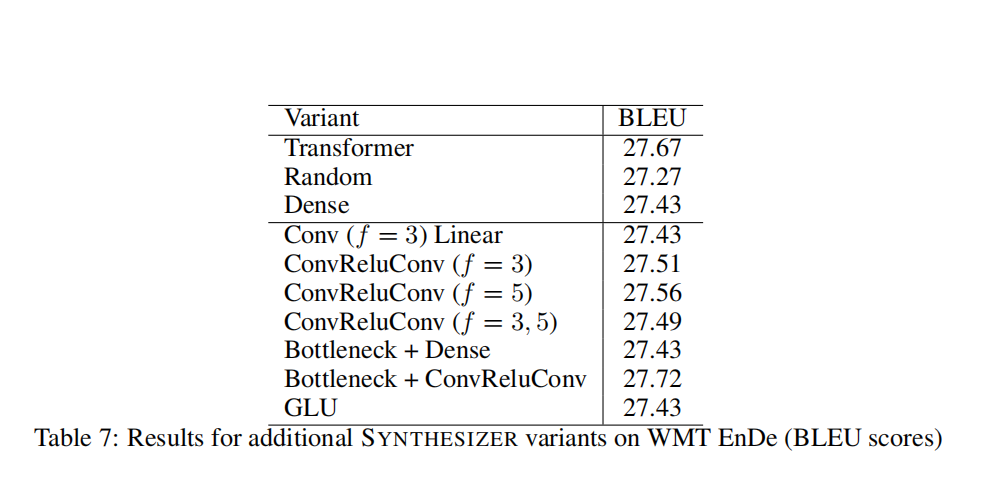